<a href="https://colab.research.google.com/github/prachiti98/GestureRecognition/blob/master/Static_Signs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 491kB 55.7MB/s 
     |████████████████████████████████| 3.2MB 51.8MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


2.2.0-rc2


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Visualizing Data**

In [0]:
# Load files and assign variables to X and Y
train = pd.read_csv("/content/drive/My Drive/Still_Images/sign_mnist_train.csv")
test = pd.read_csv("/content/drive/My Drive/Still_Images/sign_mnist_test.csv")

# Define train and test set
X_train = train.drop(labels=['label'], axis=1)
Y_train = train['label']
X_test = test.drop(labels=['label'], axis=1)
Y_test = test['label']

In [0]:
# Show image from dataset
def gen_image(image):
    """Return 28x28 image given grayscale values"""
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

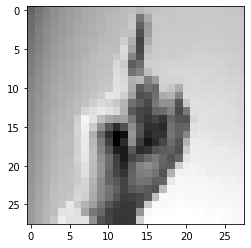

In [5]:
# Get image from training set
gen_image(np.array(X_train.iloc[0]))

**Pre-Processing**

In [0]:
# Assign numbers to corresponding label
label_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',\
             18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}
label_dict_rev = {'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'K':9,'L':10,'M':11,'N':12,'O':13,'P':14,'Q':15,'R':16,\
                 'S':17,'T':18,'U':19,'V':20,'W':21,'X':22,'Y':23}

Y_test1 = []
for i in Y_test:
    Y_test1.append(label_dict_rev.get(label_dict.get(i)))

Y_test2 = to_categorical(Y_test1, num_classes = 24)
Y_train = train['label']

Y_train1 = []
for i in Y_train:
    Y_train1.append(label_dict_rev.get(label_dict.get(i)))
    
# Classes labeled as 1-24; Need to change to 0-23 for to_categorical
Y_train2 = to_categorical(Y_train1, num_classes = 24)
X_train = train.drop(labels=['label'], axis=1)

In [0]:
# Normalize pixels
X_train1 = X_train/255
X_test1 = X_test/255

In [0]:
# Convert data to 2D form to represent height x width
X_train2 = X_train1.values.reshape(-1,28,28,1)
X_test2 = X_test1.values.reshape(-1,28,28,1)
# Split training set into 10% validation and 90% training
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train2, Y_train2, test_size = 0.3, random_state=2, stratify=Y_train2)

**Modeling**

In [9]:
# First 4 layers of model
model = Sequential()
# Layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2))) # downsampling
model.add(Dropout(0.25)) # Dropout reduces overfitting
# Layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
# Fully connected layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# use categorical crossentropy as loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define model parameters
epochs = 10
batch_size = 64
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [10]:
model.summary() # get model architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [11]:
# Fit model - Use first line when predicting and second "final" line when using validation set to find # of epochs

model.fit(X_train2, Y_train2, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])
#final = model.fit(X_train2, Y_train2, batch_size=batch_size, epochs=epochs, validation_data=(X_val,Y_val), callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 27455 samples, validate on 8237 samples
Epoch 1/10
27455/27455 [==============================] - 26s 961us/step - loss: 1.5327 - acc: 0.5254 - val_loss: 0.2755 - val_acc: 0.9337
Epoch 2/10
27455/27455 [==============================] - 26s 949us/step - loss: 0.2943 - acc: 0.9012 - val_loss: 0.0323 - val_acc: 0.9979
Epoch 3/10
27455/27455 [==============================] - 26s 949us/step - loss: 0.1050 - acc: 0.9654 - val_loss: 0.0075 - val_acc: 0.9995
Epoch 4/10
27455/27455 [==============================] - 26s 951us/step - loss: 0.0554 - acc: 0.9816 - val_loss: 8.1592e-04 - val_acc: 1.0000
Epoch 5/10
27455/27455 [==============================] - 26s 942us/step - loss: 0.0377 - acc: 0.9880 - val_loss: 6.0257e-04 - val_acc: 1.0000
Epoch 6/10
27455/27455 [==============================] - 26s 943us/step - loss: 0.0266 - acc: 0.9911 - val_loss: 1.7751e-04 - val_acc: 1.0000
Epoch 7/10


**Results**

In [0]:
# # Plot training and validation accuracy
# plt.plot(final.history['accuracy'][1:30])
# plt.plot(final.history['val_accuracy'][1:30])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'])
# plt.ylim((0.9,1)) # limit y-axis to 90-100% accuracy
# plt.show()

# # Plot training and validation loss
# plt.plot(final.history['loss'][1:30])
# plt.plot(final.history['val_loss'][1:30])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'])
# plt.show()

In [12]:
# Get CNN loss and test error
model.evaluate(X_test2, Y_test2)

7172/7172 [==============================] - 2s 258us/step


[0.34695834981947143, 0.9403234802007808]

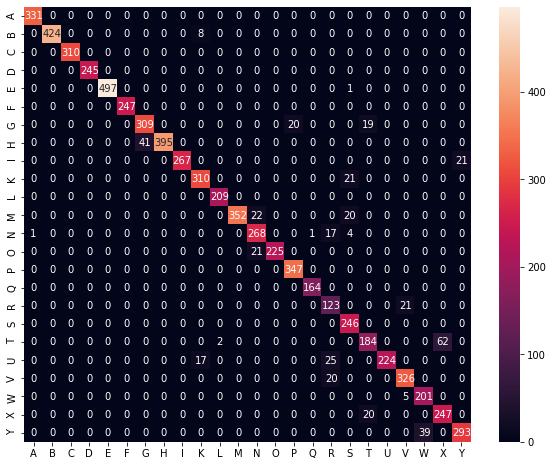

In [13]:
from sklearn.metrics import confusion_matrix
results = model.predict(X_test2) # predict test labels
Y_pred_classes = np.argmax(results, axis = 1) # Convert predictions classes to one hot vectors 
Y_true = np.argmax(Y_test2,axis = 1) # Convert validation observations to one hot vectors

# Create confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# Print confusion matrix
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot()
sns.heatmap(confusion_mtx, annot=True, fmt="d");
labels=['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R',\
             'S','T','U','V','W','X','Y']
ax1.xaxis.set_ticklabels(labels); ax1.yaxis.set_ticklabels(labels);

**Visualize CNN layer outputs**

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:10]] # Get outputs of top 10 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Model returns outputs given inputs

In [0]:
from keras.preprocessing import image
pix = np.array(X_train.iloc[0]).reshape((28,28)) # reshape input to 28x28
img_tensor = image.img_to_array(pix) # convert image to numpy array
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255. # normalize pixels
activations = activation_model.predict(img_tensor) # Returns a list Numpy arrays w/one array per layer activation

In [0]:
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name) # Names of the layers
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Create grid showing the filters
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
